# Load Ntuple

In [1]:
%load_ext autoreload
%autoreload 2

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import sys
sys.path.append('/home/belle/zhangboy/inclusive_R_D/')
import utilities as util

training_variables = util.training_variables
columns = util.all_relevant_variables

Welcome to JupyROOT 6.26/14


In [2]:
# 4S Data vs MC

cut = '(-4<B0_roeDeltae_my_mask) & (B0_roeDeltae_my_mask<1)'

# Load data files
MC_4S = uproot.concatenate([f'../../Samples/MC15ri/e_channel/1ab_quaxo_4/*.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

data_4S = uproot.concatenate([f'../../Samples/Data/e_channel/proc13_4S_quaxo_4.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

df_mc_4S = pd.DataFrame(MC_4S)
df_data_4S = pd.DataFrame(data_4S)

In [10]:
lgb_tight = 'sig_prob==largest_prob and sig_prob>0.65 and fakeD_prob<0.05'
lgb_tight += ' and B0_roeMbc_my_mask>5'
lgb_comb = 'fakeD_prob<0.1 and continuum_prob<0.1 and combinatorial_prob>0.7'

for df in [df_mc_4S,df_data_4S,]:
    # df.eval(f'cos_D_l = (D_px*ell_px + D_py*ell_py + D_pz*ell_pz)/(D_p*ell_p)', inplace=True)
    df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
    df.eval('p_D_l = D_CMS_p + ell_CMS_p', inplace=True)

df_mc_4S_sr = util.apply_mva_bcs(df_mc_4S, training_variables, lgb_tight, library='lgbm')
df_mc_4S_comb = util.apply_mva_bcs(df_mc_4S, training_variables, lgb_comb, library='lgbm')
df_data_4S_comb = util.apply_mva_bcs(df_data_4S, training_variables, lgb_comb, library='lgbm')

In [11]:
samples=util.classify_mc_dict(df_mc_4S_comb, 'e', template=False)
samples_sr = util.classify_mc_dict(df_mc_4S_sr, 'e', template=False)

mpl=util.mpl(samples,df_data_4S_comb)

for name, df in samples.items():
    print(name, len(df))

bkg_fakeD 84490
bkg_TDFl 11688
bkg_fakeTracks 2819
bkg_continuum 8636
bkg_combinatorial 94956
bkg_singleBbkg 14523
bkg_other_TDTl 0
$D\tau\nu$ 160
$D^\ast\tau\nu$ 115
$D\ell\nu$ 1025
$D^\ast\ell\nu$ 1086
$D^{\ast\ast}\tau\nu$ 420
$D^{\ast\ast}\ell\nu$_narrow 1567
$D^{\ast\ast}\ell\nu$_broad 1681
$D\ell\nu$_gap_pi 2720
$D\ell\nu$_gap_eta 2479
bkg_other_signal 0


In [13]:
for name, df in samples_sr.items():
    print(name, len(df))

bkg_fakeD 47231
bkg_TDFl 6410
bkg_fakeTracks 2504
bkg_continuum 13201
bkg_combinatorial 15123
bkg_singleBbkg 9611
bkg_other_TDTl 0
$D\tau\nu$ 4241
$D^\ast\tau\nu$ 2483
$D\ell\nu$ 90285
$D^\ast\ell\nu$ 57809
$D^{\ast\ast}\tau\nu$ 1472
$D^{\ast\ast}\ell\nu$_narrow 18372
$D^{\ast\ast}\ell\nu$_broad 14111
$D\ell\nu$_gap_pi 3468
$D\ell\nu$_gap_eta 3076
bkg_other_signal 0


In [32]:
lgb_sr_sinB = util.classify_combinatorial(samples_sr['bkg_singleBbkg'])
for name, df in lgb_sr_sinB.items():
    print(name, len(df))

DSemiB_ellPri 0
DSemiB_ellSec 57
DHad1Charm_ellPri 0
DHad1Charm_ellSec 327
DHad2Charm_ellPri 0
DHad2Charm_ellSec 9227
others 0


In [42]:
lgb_sr_sinB['DHad2Charm_ellSec'][['ell_genMotherPDG']].value_counts()

ell_genMotherPDG
 431.0              1634
-431.0              1567
-411.0              1303
 411.0              1267
 421.0               858
-15.0                841
 15.0                803
-421.0               797
 22.0                 78
 111.0                56
 221.0                14
 4122.0                3
-4122.0                2
 331.0                 2
 223.0                 1
 333.0                 1
Name: count, dtype: int64

In [34]:
lgb_sb_comb = util.classify_combinatorial(samples['bkg_combinatorial'])
lgb_sr_comb = util.classify_combinatorial(samples_sr['bkg_combinatorial'])

samples_comb = samples.copy()
samples_comb.update({'bkg_combinatorial': pd.DataFrame(columns=columns)})
samples_comb.update(lgb_sb_comb)

samples_sr_comb = samples_sr.copy()
samples_sr_comb.update({'bkg_combinatorial': pd.DataFrame(columns=columns)})
samples_sr_comb.update(lgb_sr_comb)

mpl_comb=util.mpl(samples_comb, df_data_4S_comb)

In [35]:
for name, df in samples_comb.items():
    print(name, len(df))

bkg_fakeD 84490
bkg_TDFl 11688
bkg_fakeTracks 2819
bkg_continuum 8636
bkg_combinatorial 0
bkg_singleBbkg 14523
bkg_other_TDTl 0
$D\tau\nu$ 160
$D^\ast\tau\nu$ 115
$D\ell\nu$ 1025
$D^\ast\ell\nu$ 1086
$D^{\ast\ast}\tau\nu$ 420
$D^{\ast\ast}\ell\nu$_narrow 1567
$D^{\ast\ast}\ell\nu$_broad 1681
$D\ell\nu$_gap_pi 2720
$D\ell\nu$_gap_eta 2479
bkg_other_signal 0
DSemiB_ellPri 603
DSemiB_ellSec 3584
DHad1Charm_ellPri 13392
DHad1Charm_ellSec 36271
DHad2Charm_ellPri 19490
DHad2Charm_ellSec 21544
others 72


In [36]:
for name, df in samples_sr_comb.items():
    print(name, len(df))

bkg_fakeD 47231
bkg_TDFl 6410
bkg_fakeTracks 2504
bkg_continuum 13201
bkg_combinatorial 0
bkg_singleBbkg 9611
bkg_other_TDTl 0
$D\tau\nu$ 4241
$D^\ast\tau\nu$ 2483
$D\ell\nu$ 90285
$D^\ast\ell\nu$ 57809
$D^{\ast\ast}\tau\nu$ 1472
$D^{\ast\ast}\ell\nu$_narrow 18372
$D^{\ast\ast}\ell\nu$_broad 14111
$D\ell\nu$_gap_pi 3468
$D\ell\nu$_gap_eta 3076
bkg_other_signal 0
DSemiB_ellPri 188
DSemiB_ellSec 2172
DHad1Charm_ellPri 1328
DHad1Charm_ellSec 5215
DHad2Charm_ellPri 3495
DHad2Charm_ellSec 2712
others 13


# Control regions
## 1. roeMbc<5
### a. Plot data vs MC

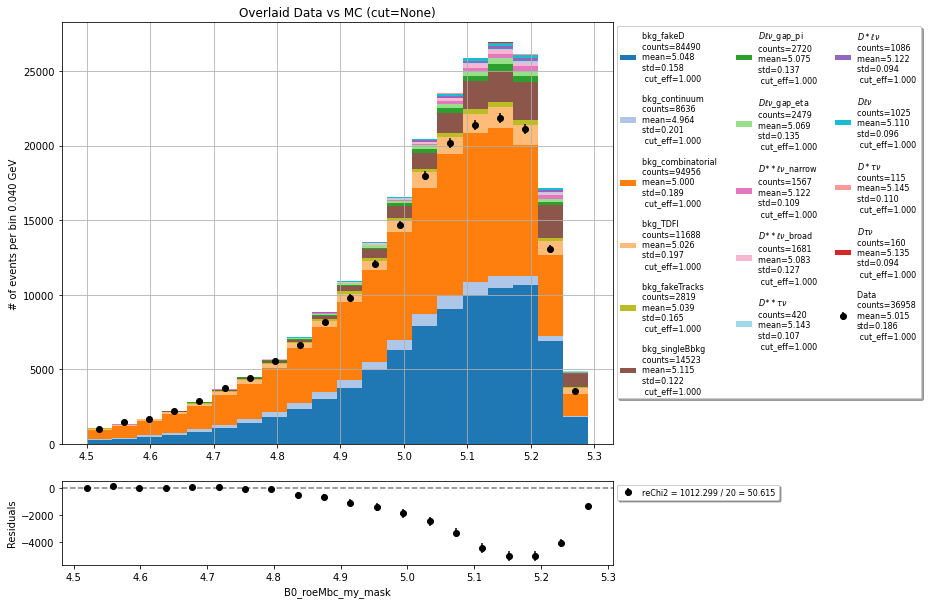

In [28]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(4.5,5.29,21)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_roeMbc_my_mask',bins=b1,cut=None,weights={'data':1000/187},
    correction=False,mask=[],figsize=(13,8.5),ratio=False,
                                legend_nc=3, legend_fs=8)

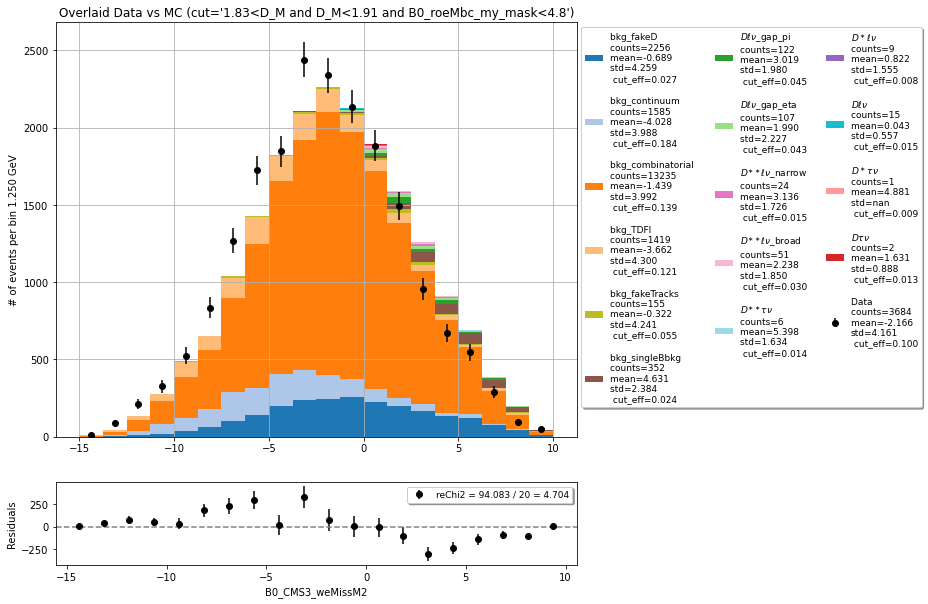

In [32]:
# D_M signal region
b1 = np.linspace(-15,10,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(13,8.5),
                          cut='1.83<D_M and D_M<1.91 and B0_roeMbc_my_mask<4.8',
                             correction=False,mask=[],ratio=False,
                             legend_nc=3,legend_fs=9,
                             weights={
                              'DSemiB_ellPri':    1,
                              'DSemiB_ellSec':    1,
                              'DHad1Charm_ellPri':1,
                              'DHad1Charm_ellSec':1,
                              'DHad2Charm_ellPri':1,
                              'DHad2Charm_ellSec':1,
                              'data':1000/187})

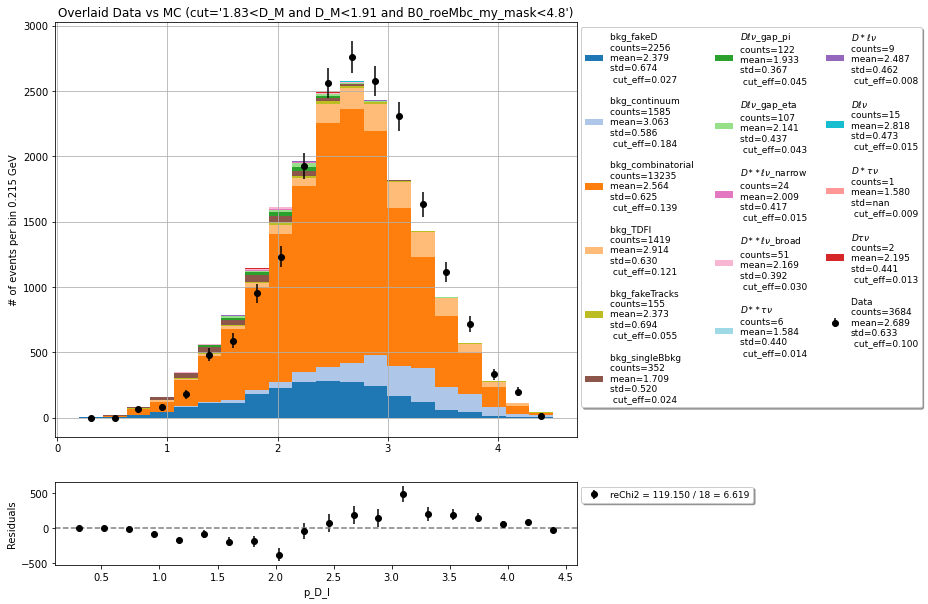

In [35]:
b2 = np.linspace(0.2,4.5,21)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,figsize=(13,8.5),
                          cut='1.83<D_M and D_M<1.91 and B0_roeMbc_my_mask<4.8',
                             correction=False,mask=[],ratio=False,
                             legend_nc=3,legend_fs=9,
                             weights={
                              'DSemiB_ellPri':    1,
                              'DSemiB_ellSec':    1,
                              'DHad1Charm_ellPri':1,
                              'DHad1Charm_ellSec':1,
                              'DHad2Charm_ellPri':1,
                              'DHad2Charm_ellSec':1,
                              'data':1000/187})

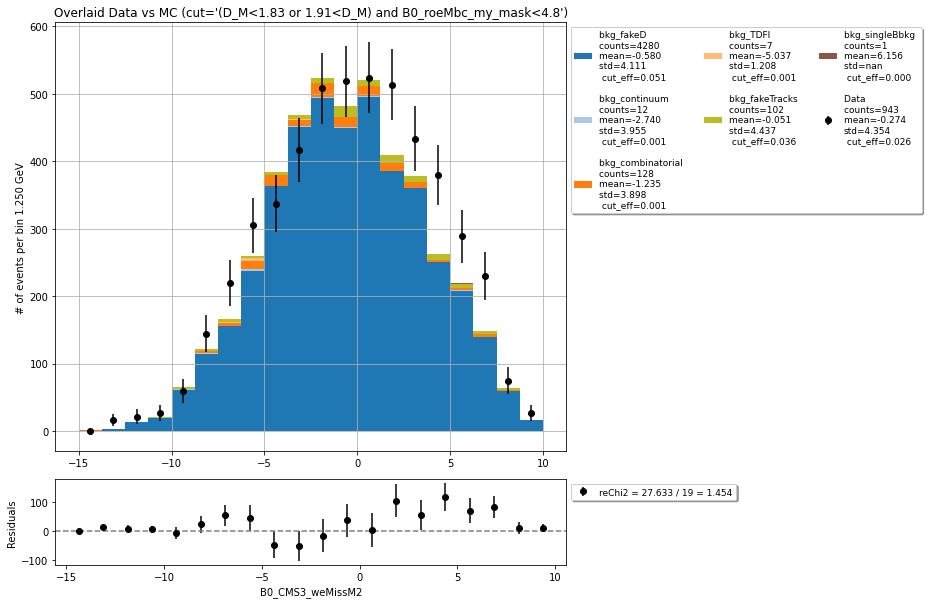

In [43]:
# sidebands
b1 = np.linspace(-15,10,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(13,8.5),
                          cut='(D_M<1.83 or 1.91<D_M) and B0_roeMbc_my_mask<4.8',
                            correction=False,mask=[],ratio=False,
                            legend_nc=3,legend_fs=9,
                            weights={
                              'DSemiB_ellPri':    1,
                              'DSemiB_ellSec':    1,
                              'DHad1Charm_ellPri':1,
                              'DHad1Charm_ellSec':1,
                              'DHad2Charm_ellPri':1,
                              'DHad2Charm_ellSec':1,
                              'data':1000/187})

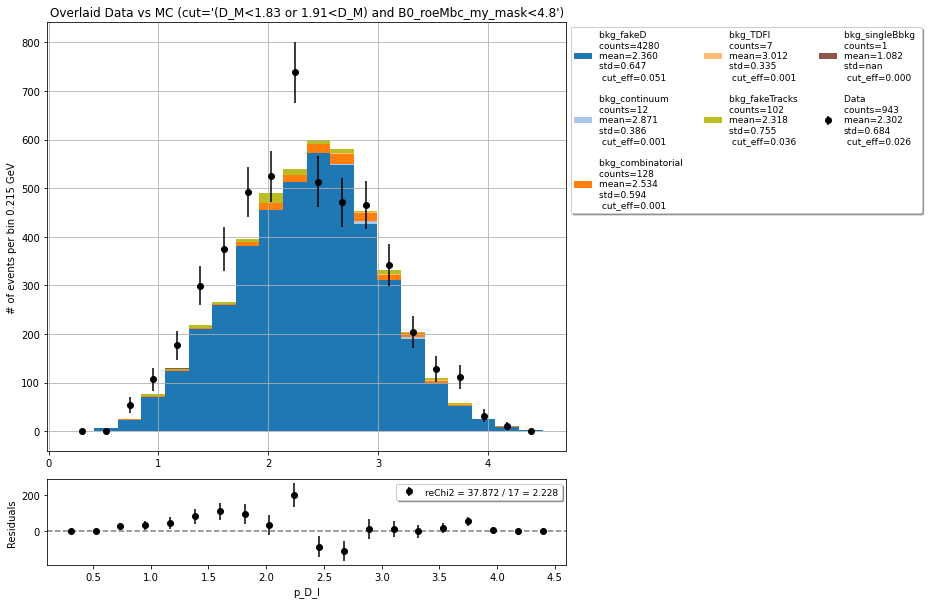

In [45]:
# sidebands
b2 = np.linspace(0.2,4.5,21)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,figsize=(13,8.5),
                          cut='(D_M<1.83 or 1.91<D_M) and B0_roeMbc_my_mask<4.8',
                            correction=False,mask=[],ratio=False,
                            legend_nc=3,legend_fs=9,
                            weights={
                              'DSemiB_ellPri':    1,
                              'DSemiB_ellSec':    1,
                              'DHad1Charm_ellPri':1,
                              'DHad1Charm_ellSec':1,
                              'DHad2Charm_ellPri':1,
                              'DHad2Charm_ellSec':1,
                              'data':1000/187})

### b. Plot lgb sidebands vs signal region

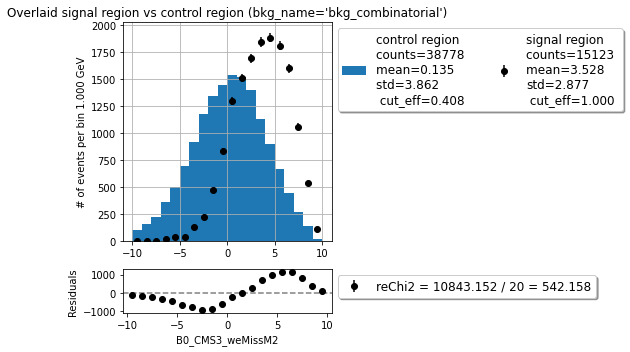

In [15]:
# compare control vs signal regions MC
b1 = np.linspace(-10,10,21)
weights = {'control region': 151/388,
         'signal region': 1}
mpl.plot_mc_sig_control(variable='B0_CMS3_weMissM2',bins=b1,
                        bkg_name='bkg_combinatorial',
                        cut='B0_roeMbc_my_mask<5',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

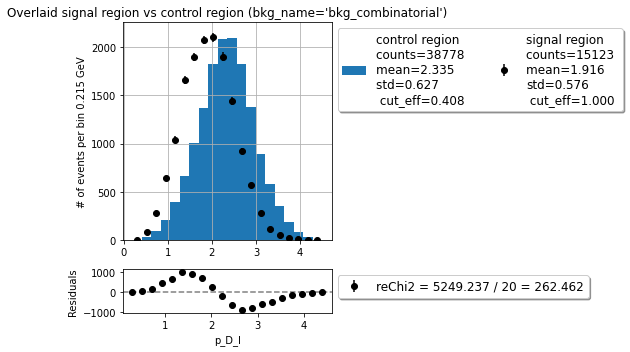

In [16]:
b2 = np.linspace(0.2,4.5,21)
mpl.plot_mc_sig_control(variable='p_D_l',bins=b2,
                        bkg_name='bkg_combinatorial',cut='B0_roeMbc_my_mask<5',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

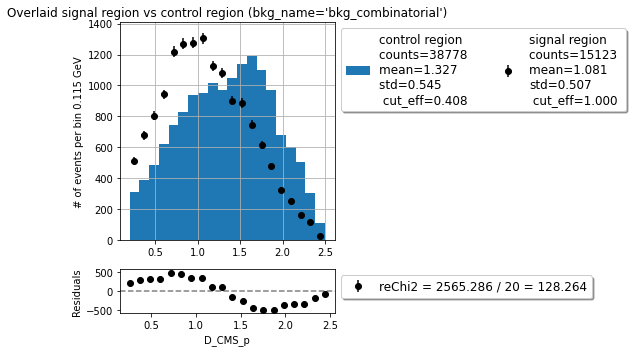

In [17]:
b2 = np.linspace(0.2,2.5,21)
mpl.plot_mc_sig_control(variable='D_CMS_p',bins=b2,
                        bkg_name='bkg_combinatorial',cut='B0_roeMbc_my_mask<5',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

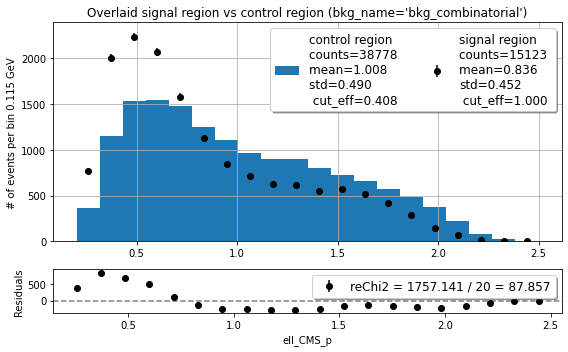

In [18]:
b2 = np.linspace(0.2,2.5,21)
mpl.plot_mc_sig_control(variable='ell_CMS_p',bins=b2,
                        bkg_name='bkg_combinatorial',cut='B0_roeMbc_my_mask<5',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

### c. Subtract the fakeD

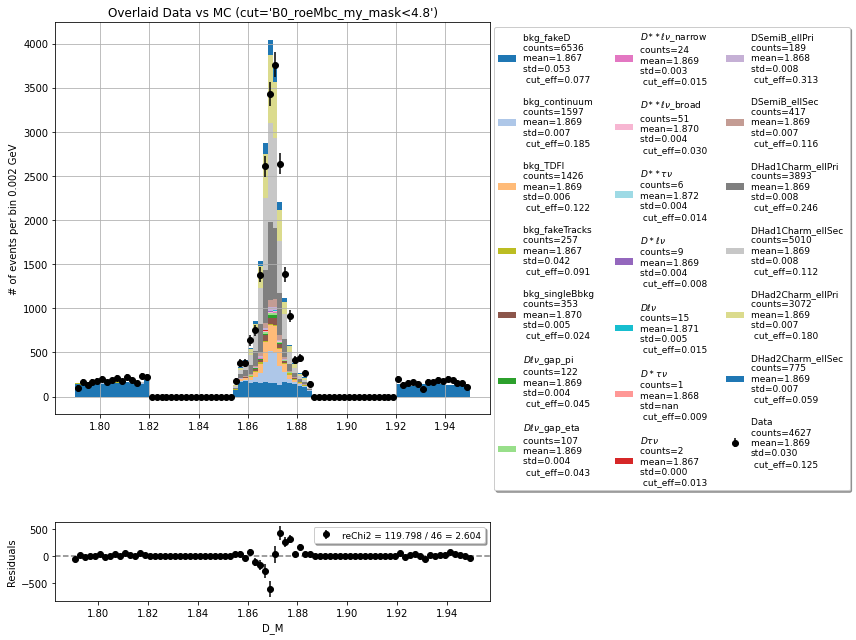

In [9]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,81)
data_hist_all, mc_hist_all = mpl_comb.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='B0_roeMbc_my_mask<4.8',correction=False,mask=[],
    figsize=(12,9),ratio=False,legend_nc=3,legend_fs=9,
    weights={
            'DSemiB_ellPri':    1,
            'DSemiB_ellSec':    1,
            'DHad1Charm_ellPri':1,
            'DHad1Charm_ellSec':1,
            'DHad2Charm_ellPri':1,
            'DHad2Charm_ellSec':1,
            'data':1000/187})

In [10]:
fitter = util.fit_Dmass(x_edges=b1, hist=data_hist_all, poly_only=True)
m_ml, c_ml, result_ml = fitter.fit_gauss_poly_ML(deg=1)
m_ml

initial parameters= [ 4.95000e+01  1.87000e+00  3.00000e-02  2.47433e+04 -1.37300e+02
  4.25100e+02]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 199.3 (chi2/ndof = 7.7)    │              Nfcn = 119              │
│ EDM = 3.92e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │    0.0    │    0.5    │            │            │    0    │         │  yes  │
│ 1 │ x1   │   1.870   │   0.019   │            │            │    0    │         │  yes  │
│ 2 │ x2   │  30.0e-3  │  0.3e-3   │            │            │    0    │         │  yes  │
│ 3 │ x3   │  13.32e3  │  0.19e3   │            │            │         │         │       │
│ 4 │ x4   │  -0.12e3  │  0.11e3   │            │            │         │         │       │
│ 5 │ x5   │  0.38e3   │  0.34e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────┐
│    │        x0        x1        x2        x3        x4        x5 │
├────┼─────────────────────────────────────────────────────────────┤
│ x0 │         0         0         0         0         0         0 │
│ x1 │         0         0         0         0         0         0 │
│ x2 │         0         0         0         0         0         0 │
│ x3 │         0         0         0  3.68e+04     -41.6      -115 │
│ x4 │         0         0         0     -41.6  1.13e+04 -3.62e+04 │
│ x5 │         0         0         0      -115 -3.62e+04  1.19e+05 │
└────┴─────────────────────────────────────────────────────────────┘

In [11]:
yields_left = fitter.poly_integral(xrange=[1.79,1.82],result=result_ml)
yields_sig = fitter.poly_integral(xrange=[1.855,1.885],result=result_ml)
yields_right = fitter.poly_integral(xrange=[1.92,1.95],result=result_ml)

Yields from 1.79 to 1.82 = 2615.872 ± 52.603
Yields from 1.855 to 1.885 = 2498.115 ± 35.982
Yields from 1.92 to 1.95 = 2380.359 ± 48.837


In [15]:
a = len(df_data_4S_comb.query('1.79<D_M<1.82 and B0_roeMbc_my_mask<4.8')) * 1000/187
b = len(df_data_4S_comb.query('1.92<D_M<1.95 and B0_roeMbc_my_mask<4.8')) * 1000/187
print('data', a,b)

data 2679.144385026738 2363.6363636363635


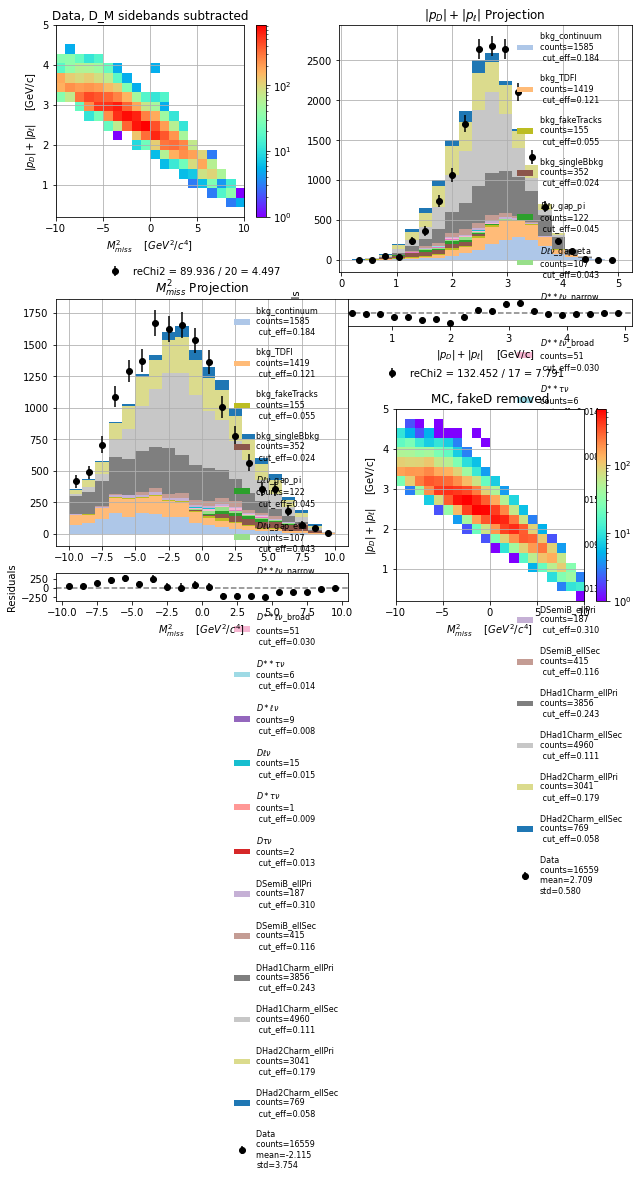

In [59]:
b_mm2 = np.linspace(-10,10,21)
b_pDl = np.linspace(0.2,5,21)
scale = {'data left sideband': 25/26/2 * 1000/187,
         'data right sideband': 250/238/2 * 1000/187,
         'data signal region': 1000/187}

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<4.8', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl_comb.plot_data_subtracted_and_mc(**par_dict)

### d.  Fit the combinatorial components

In [60]:
import json
spec_comb_e = util.create_workspace(temp_asimov_channels=[temp_data],
                               mc_uncer=True,fakeD_uncer=True)
spec_comb_e['measurements'][0]['config']['poi']="DHad2Charm_ellSec_norm"
print(json.dumps(spec_comb_e, sort_keys=True, indent=4))

{
    "channels": [
        {
            "name": "channel_0",
            "samples": [
                {
                    "data": [
                        3.0,
                        36.0,
                        27.0,
                        6.0,
                        4.0,
                        7.0,
                        39.0,
                        9.0,
                        7.0,
                        7.0,
                        0.0,
                        46.0,
                        23.0,
                        14.0,
                        2.0,
                        0.0,
                        0.0,
                        30.0,
                        48.0,
                        25.0,
                        7.0,
                        6.0,
                        1.0,
                        1.0,
                        64.0,
                        45.0,
                        22.0,
                        5.0,
                        5.0,
           

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\ell\nu$_gap_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad1Charm_ellPri_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad1Charm_ellSec_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad2Charm_ellPri_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifi

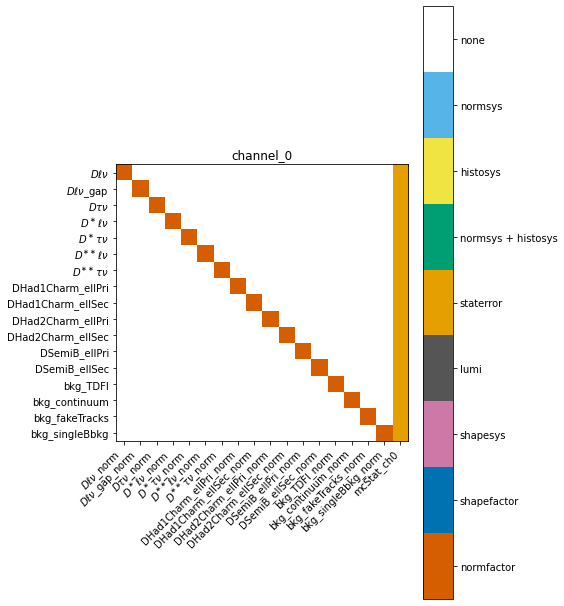

In [61]:
import cabinetry, pyhf
cabinetry.set_logging()
cabinetry.visualize.modifier_grid(pyhf.Workspace(spec_comb_e).model())

In [62]:
model_comb, data_comb = cabinetry.model_utils.model_and_data(spec_comb_e)
pars = model_comb.config.suggested_init()

norm_parameter_names = [par for par in model_comb.config.par_order if par.endswith('_norm')]
for par in norm_parameter_names:
    model_comb.config.param_set(par).suggested_bounds=[[0,5]]
    if par.startswith('$'):
        model_comb.config.param_set(par).suggested_fixed=[True]

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\ell\nu$_gap_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad1Charm_ellPri_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad1Charm_ellSec_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad2Charm_ellPri_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifi

In [70]:
%%time
pyhf.set_backend("jax")
fit_results = cabinetry.fit.fit(model=model_comb, data=data_comb,goodness_of_fit=True,
                                init_pars=[1]*7+[1]*6+pars[13:],
#                                 fix_pars=[True]*112
                               )

INFO - cabinetry.fit - performing maximum likelihood fit


W FCN result is NaN for [ 1 1 1 1 1 1 1 nan 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 nan 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 1 nan 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 1 nan 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

ERROR - pyhf.optimize.mixins -   message: Optimization failed. Estimated distance to minimum too large.
  success: False
      fun: inf
        x: <ValueView $D\ell\nu$_norm=1.0 $D\ell\nu$_gap_norm=1.0 $D\tau\nu$_norm=1.0 $D^\ast\ell\nu$_norm=1.0 $D^\ast\tau\nu$_norm=1.0 $D^{\ast\ast}\ell\nu$_norm=1.0 $D^{\ast\ast}\tau\nu$_norm=1.0 DHad1Charm_ellPri_norm=1.0 DHad1Charm_ellSec_norm=1.0 DHad2Charm_ellPri_norm=1.0 DHad2Charm_ellSec_norm=1.0 DSemiB_ellPri_norm=1.0 DSemiB_ellSec_norm=1.0 bkg_TDFl_norm=1.0 bkg_continuum_norm=1.0 bkg_fakeTracks_norm=1.0 bkg_singleBbkg_norm=1.0 mcStat_ch0[0]=1.0000000000000002 mcStat_ch0[1]=1.0000000000000002 mcStat_ch0[2]=1.0000000000000002 mcStat_ch0[3]=1.0000000000000002 mcStat_ch0[4]=1.0000000000000002 mcStat_ch0[5]=1.0000000000000002 mcStat_ch0[6]=1.0000000000000002 mcStat_ch0[7]=1.0000000000000002 mcStat_ch0[8]=1.0000000000000002 mcStat_ch0[9]=1.0000000000000002 mcStat_ch0[10]=1.0000000000000002 mcStat_ch0[11]=1.0000000000000002 mcStat_ch0[12]=1.00000000

W FCN result is NaN for [ 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 nan 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 nan 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 nan 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 nan 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

FailedMinimization: Optimization failed. Estimated distance to minimum too large.

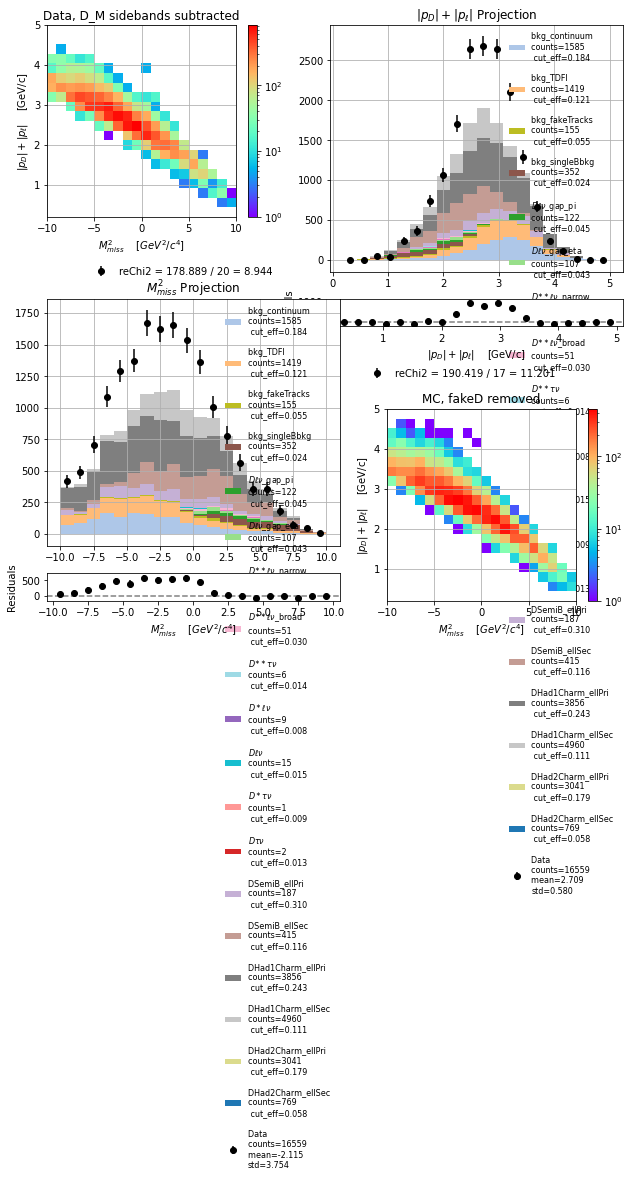

In [141]:
# BDT signal
b_mm2 = np.linspace(-10,10,21)
b_pDl = np.linspace(0.2,5,21)
weights={'data left sideband': 25/26/2 * 1000/187,
         'data right sideband': 250/238/2 * 1000/187,
         'data signal region': 1000/187,
         'DSemiB_ellPri':       5,
         'DSemiB_ellSec':       4.77,
         'DHad1Charm_ellPri':   1.14,
         'DHad1Charm_ellSec':   0.37,
         'DHad2Charm_ellPri':   0,
         'DHad2Charm_ellSec':   0, }

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<4.8', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': weights,
          'correction': False,
          'mask': ['bkg_fakeD']}
a, b = mpl_comb.plot_data_subtracted_and_mc(**par_dict)

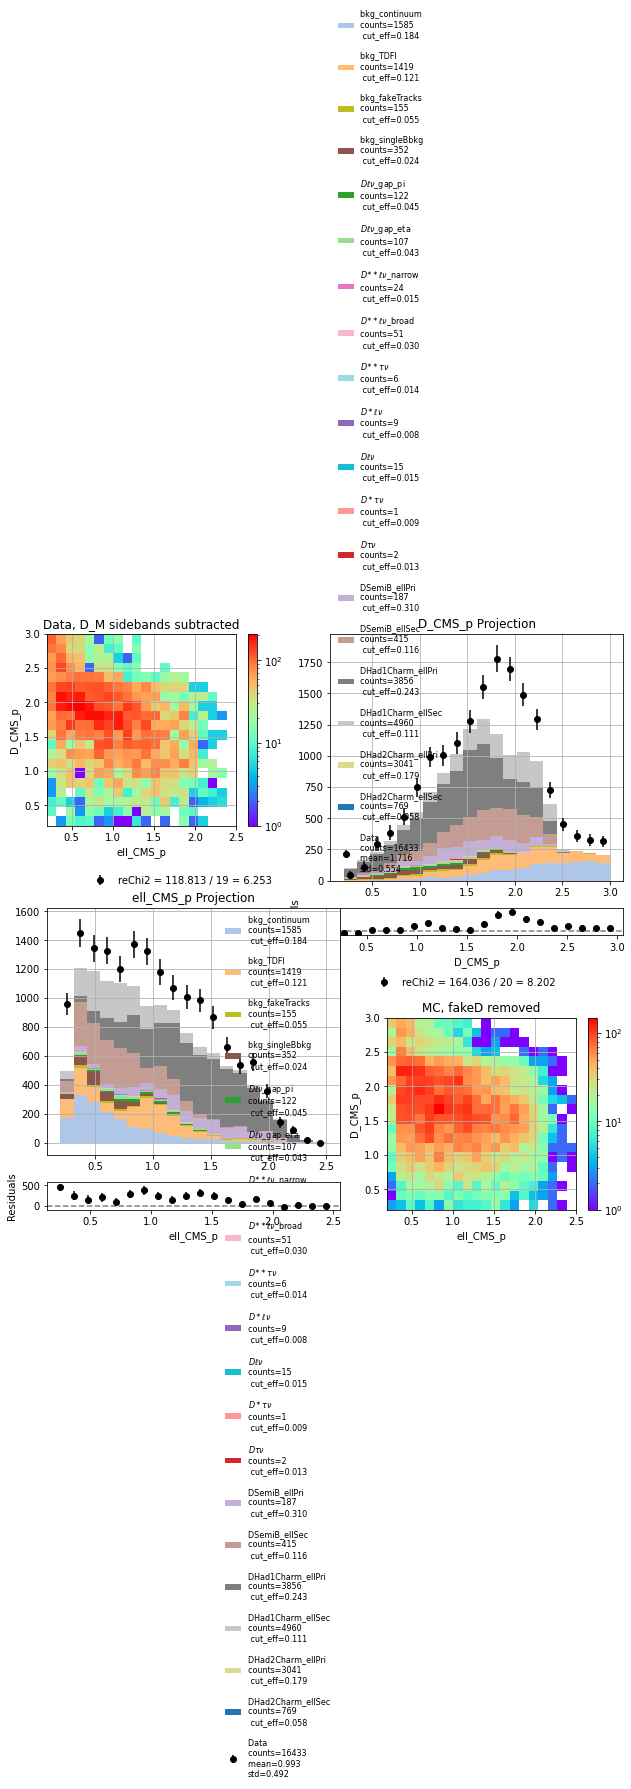

In [142]:
# BDT signal, pl; pd
b_mm2 = np.linspace(0.2,2.5,21)
b_pDl = np.linspace(0.2,3,21)
par_dict={'var_list':['ell_CMS_p','D_CMS_p'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<4.8',
          'weights': weights,
          'correction': False,
          'mask': ['bkg_fakeD']}
a,b = mpl_comb.plot_data_subtracted_and_mc(**par_dict)

## 2. B0_vtxReChi2>5
### a. Plot Data vs MC

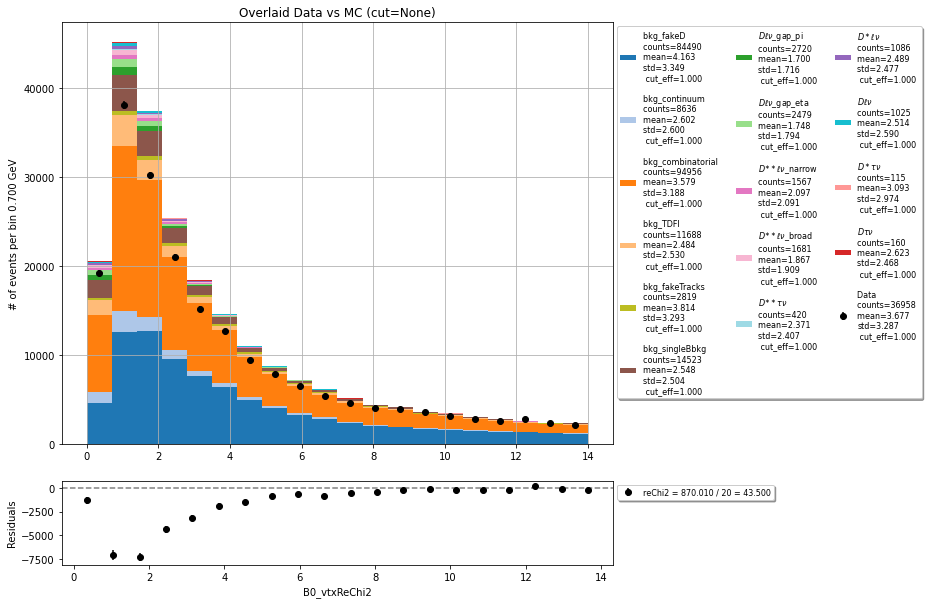

In [74]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(0,14,21)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_vtxReChi2',bins=b1,cut=None,weights={'data':1000/187},
    correction=False,mask=[],figsize=(13,8.5),ratio=False,
                                legend_nc=3, legend_fs=8)

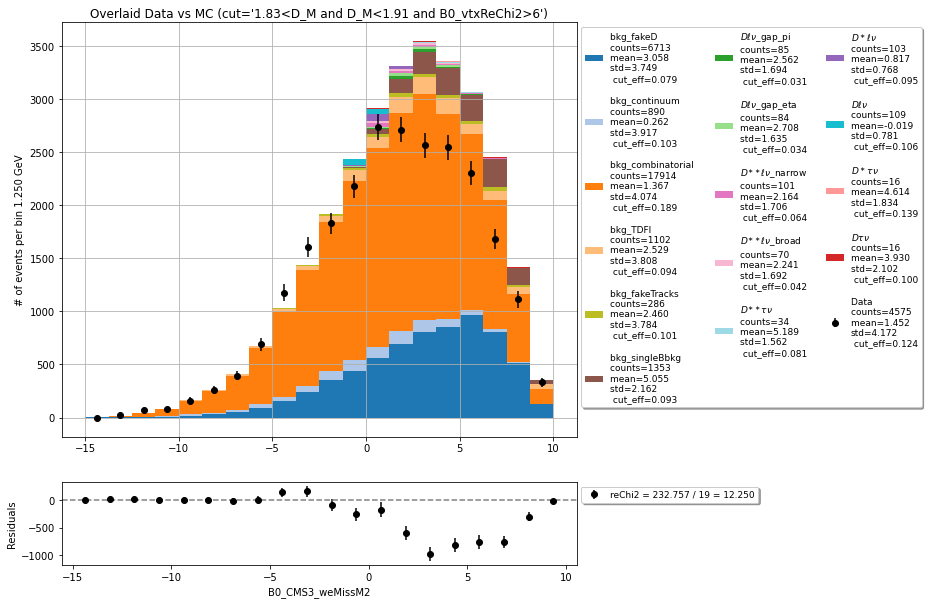

In [77]:
# D_M signal region
b1 = np.linspace(-15,10,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(13,8.5),
                          cut='1.83<D_M and D_M<1.91 and B0_vtxReChi2>6',
                             correction=False,mask=[],ratio=False,
                             legend_nc=3,legend_fs=9,
                             weights={
                              'DSemiB_ellPri':    1,
                              'DSemiB_ellSec':    1,
                              'DHad1Charm_ellPri':1,
                              'DHad1Charm_ellSec':1,
                              'DHad2Charm_ellPri':1,
                              'DHad2Charm_ellSec':1,
                              'data':1000/187})

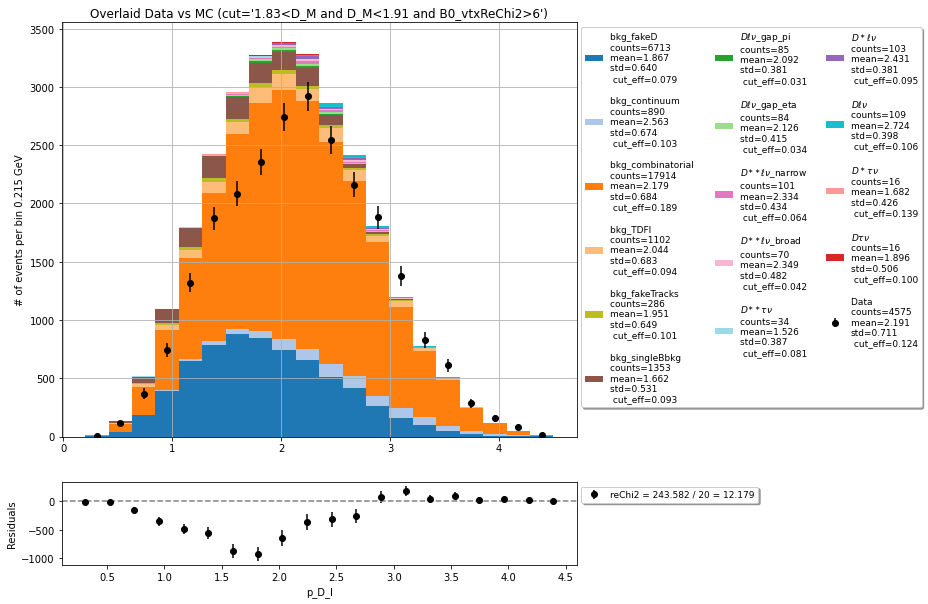

In [78]:
b2 = np.linspace(0.2,4.5,21)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,figsize=(13,8.5),
                          cut='1.83<D_M and D_M<1.91 and B0_vtxReChi2>6',
                             correction=False,mask=[],ratio=False,
                             legend_nc=3,legend_fs=9,
                             weights={
                              'DSemiB_ellPri':    1,
                              'DSemiB_ellSec':    1,
                              'DHad1Charm_ellPri':1,
                              'DHad1Charm_ellSec':1,
                              'DHad2Charm_ellPri':1,
                              'DHad2Charm_ellSec':1,
                              'data':1000/187})

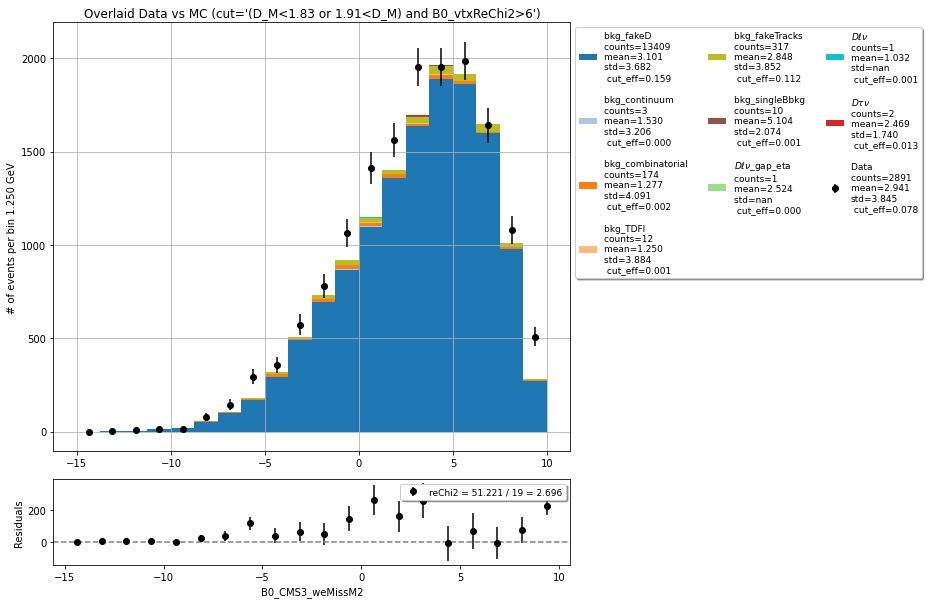

In [79]:
# sidebands
b1 = np.linspace(-15,10,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(13,8.5),
                          cut='(D_M<1.83 or 1.91<D_M) and B0_vtxReChi2>6',
                            correction=False,mask=[],ratio=False,
                            legend_nc=3,legend_fs=9,
                            weights={
                              'DSemiB_ellPri':    1,
                              'DSemiB_ellSec':    1,
                              'DHad1Charm_ellPri':1,
                              'DHad1Charm_ellSec':1,
                              'DHad2Charm_ellPri':1,
                              'DHad2Charm_ellSec':1,
                              'data':1000/187})

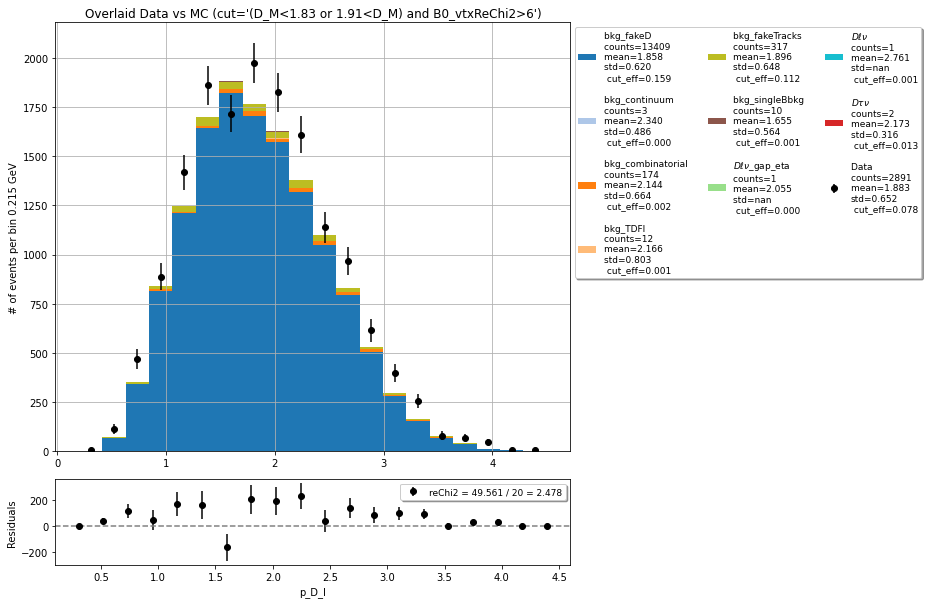

In [80]:
# sidebands
b2 = np.linspace(0.2,4.5,21)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,figsize=(13,8.5),
                          cut='(D_M<1.83 or 1.91<D_M) and B0_vtxReChi2>6',
                            correction=False,mask=[],ratio=False,
                            legend_nc=3,legend_fs=9,
                            weights={
                              'DSemiB_ellPri':    1,
                              'DSemiB_ellSec':    1,
                              'DHad1Charm_ellPri':1,
                              'DHad1Charm_ellSec':1,
                              'DHad2Charm_ellPri':1,
                              'DHad2Charm_ellSec':1,
                              'data':1000/187})

### b. Plot lgb sidebands vs signal region

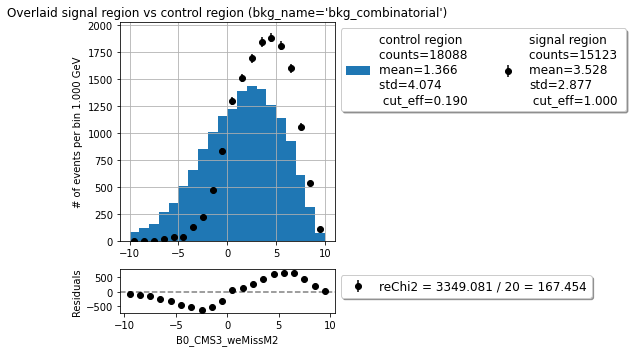

In [19]:
# compare control vs signal regions MC
b1 = np.linspace(-10,10,21)
weights = {'control region': 151/181,
         'signal region': 1}
mpl.plot_mc_sig_control(variable='B0_CMS3_weMissM2',bins=b1,
                        bkg_name='bkg_combinatorial',
                        cut='B0_vtxReChi2>6',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

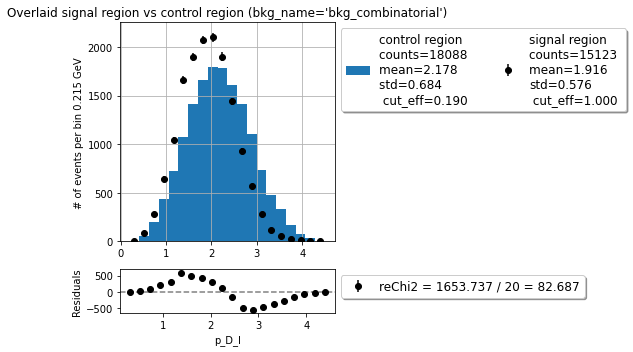

In [20]:
b2 = np.linspace(0.2,4.5,21)
mpl.plot_mc_sig_control(variable='p_D_l',bins=b2,
                        bkg_name='bkg_combinatorial',cut='B0_vtxReChi2>6',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

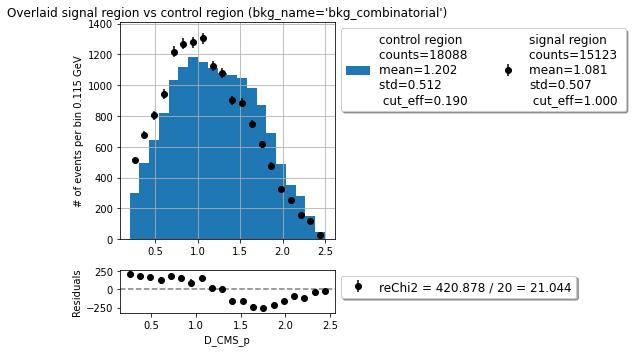

In [21]:
b2 = np.linspace(0.2,2.5,21)
mpl.plot_mc_sig_control(variable='D_CMS_p',bins=b2,
                        bkg_name='bkg_combinatorial',cut='B0_vtxReChi2>6',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

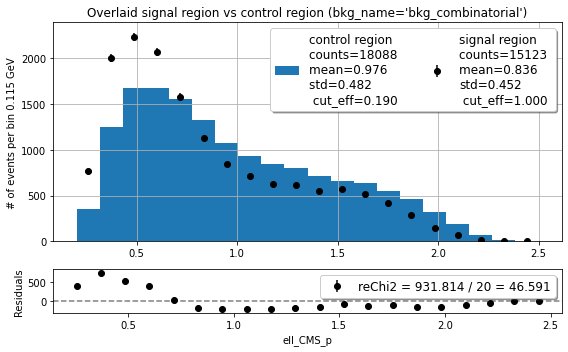

In [22]:
b2 = np.linspace(0.2,2.5,21)
mpl.plot_mc_sig_control(variable='ell_CMS_p',bins=b2,
                        bkg_name='bkg_combinatorial',cut='B0_vtxReChi2>6',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

### c. Subtract the fakeD

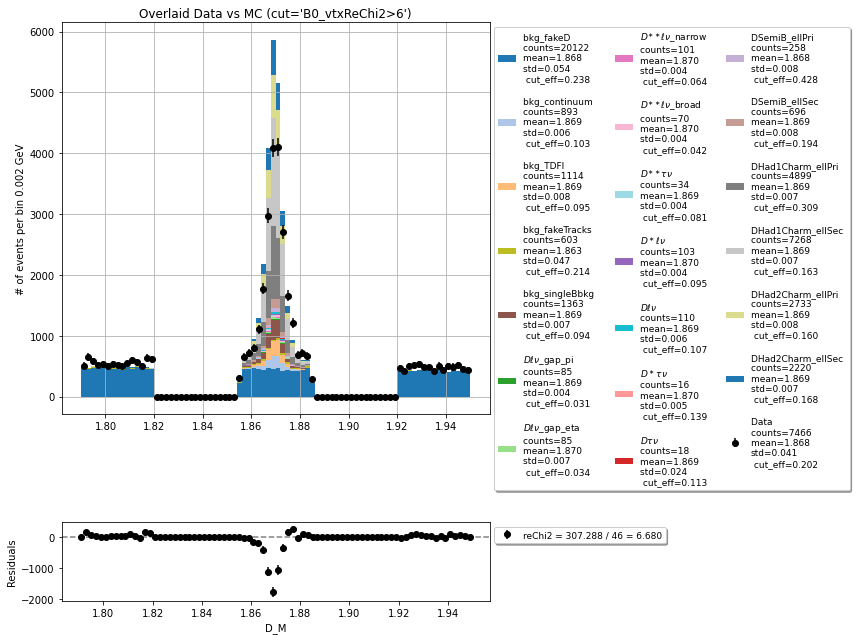

In [113]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,81)
data_hist_all, mc_hist_all = mpl_comb.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='B0_vtxReChi2>6',correction=False,mask=[],
    figsize=(12,9),ratio=False,legend_nc=3,legend_fs=9,
    weights={
            'DSemiB_ellPri':    1,
            'DSemiB_ellSec':    1,
            'DHad1Charm_ellPri':1,
            'DHad1Charm_ellSec':1,
            'DHad2Charm_ellPri':1,
            'DHad2Charm_ellSec':1,
            'data':1000/187})

In [114]:
fitter = util.fit_Dmass(x_edges=b1, hist=data_hist_all, poly_only=True)
m_ml, c_ml, result_ml = fitter.fit_gauss_poly_ML(deg=1)
m_ml

initial parameters= [ 7.99000e+01  1.87000e+00  4.00000e-02  3.99251e+04 -5.66600e+02
  1.57540e+03]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 105 (chi2/ndof = 4.0)      │              Nfcn = 69               │
│ EDM = 5.15e-07 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │    0.0    │    0.8    │            │            │    0    │         │  yes  │
│ 1 │ x1   │   1.870   │   0.019   │            │            │    0    │         │  yes  │
│ 2 │ x2   │  40.0e-3  │  0.4e-3   │            │            │    0    │         │  yes  │
│ 3 │ x3   │  41.03e3  │  0.34e3   │            │            │         │         │       │
│ 4 │ x4   │  -0.55e3  │  0.28e3   │            │            │         │         │       │
│ 5 │ x5   │   1.5e3   │   0.8e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────┐
│    │        x0        x1        x2        x3        x4        x5 │
├────┼─────────────────────────────────────────────────────────────┤
│ x0 │         0         0         0         0         0         0 │
│ x1 │         0         0         0         0         0         0 │
│ x2 │         0         0         0         0         0         0 │
│ x3 │         0         0         0  1.13e+05      -104      -261 │
│ x4 │         0         0         0      -104  8.05e+04 -2.27e+05 │
│ x5 │         0         0         0      -261 -2.27e+05  6.42e+05 │
└────┴─────────────────────────────────────────────────────────────┘

In [115]:
yields_left = fitter.poly_integral(xrange=[1.79,1.82],result=result_ml)
yields_sig = fitter.poly_integral(xrange=[1.855,1.885],result=result_ml)
yields_right = fitter.poly_integral(xrange=[1.92,1.95],result=result_ml)

Yields from 1.79 to 1.82 = 8217.035 ± 92.859
Yields from 1.855 to 1.885 = 7692.595 ± 63.159
Yields from 1.92 to 1.95 = 7168.155 ± 84.368


In [116]:
a = len(df_data_4S_comb.query('1.79<D_M<1.82 and B0_vtxReChi2>6')) * 1000/187
b = len(df_data_4S_comb.query('1.92<D_M<1.95 and B0_vtxReChi2>6')) * 1000/187
print('data', a,b)

data 8299.465240641712 7160.427807486631


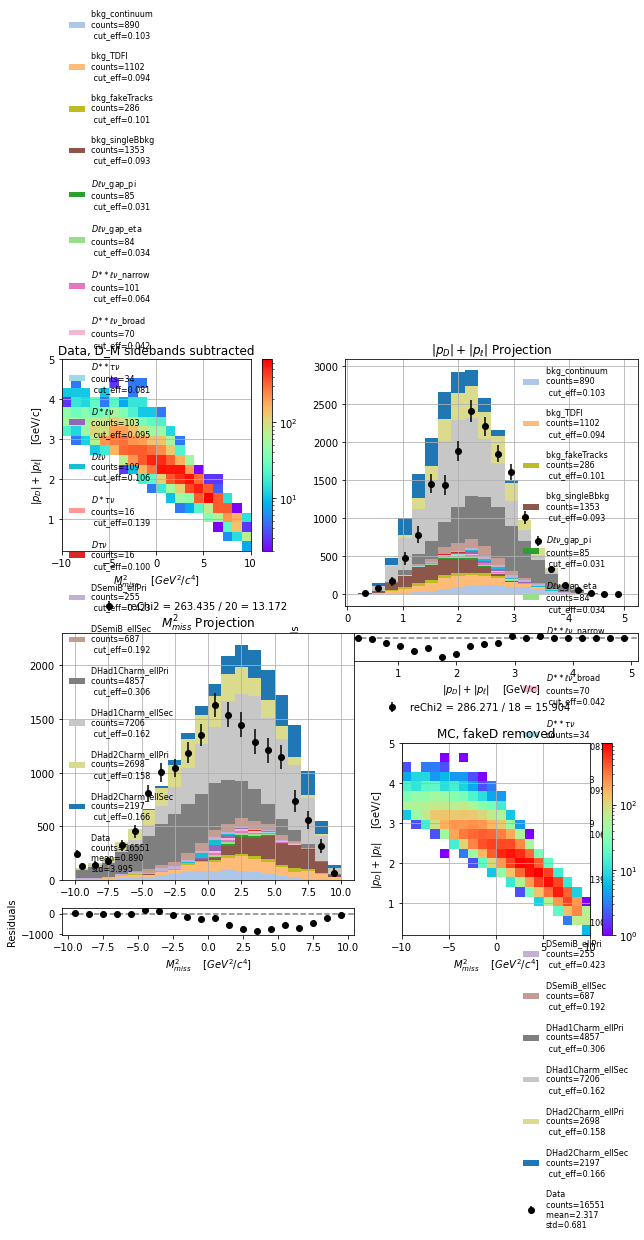

In [132]:
b_mm2 = np.linspace(-10,10,21)
b_pDl = np.linspace(0.2,5,21)
scale = {'data left sideband': 77/82/2 * 1000/187,
         'data right sideband': 77/71.7/2 * 1000/187,
         'data signal region': 1000/187}

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_vtxReChi2>6', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl_comb.plot_data_subtracted_and_mc(**par_dict)

### d.  Fit the combinatorial components

In [133]:
import json
spec_comb_e = util.create_workspace(temp_asimov_channels=[temp_data],
                               mc_uncer=True,fakeD_uncer=True)
spec_comb_e['measurements'][0]['config']['poi']="DHad2Charm_ellSec_norm"
print(json.dumps(spec_comb_e, sort_keys=True, indent=4))

{
    "channels": [
        {
            "name": "channel_0",
            "samples": [
                {
                    "data": [
                        0.0,
                        1.0,
                        0.0,
                        0.0,
                        1.0,
                        2.0,
                        0.0,
                        0.0,
                        0.0,
                        0.0,
                        4.0,
                        2.0,
                        2.0,
                        0.0,
                        0.0,
                        0.0,
                        4.0,
                        10.0,
                        2.0,
                        1.0,
                        0.0,
                        2.0,
                        4.0,
                        6.0,
                        3.0,
                        2.0,
                        1.0,
                        4.0,
                        11.0,
                     

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\ell\nu$_gap_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad1Charm_ellPri_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad1Charm_ellSec_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad2Charm_ellPri_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifi

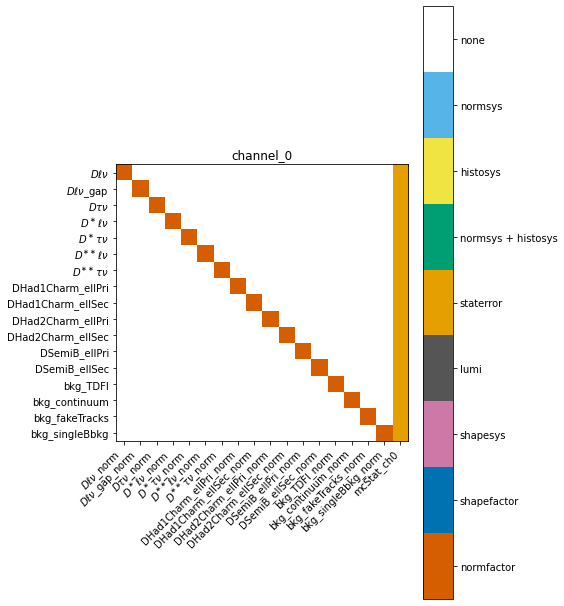

In [134]:
import cabinetry, pyhf
cabinetry.set_logging()
cabinetry.visualize.modifier_grid(pyhf.Workspace(spec_comb_e).model())

In [135]:
model_comb, data_comb = cabinetry.model_utils.model_and_data(spec_comb_e)
pars = model_comb.config.suggested_init()

norm_parameter_names = [par for par in model_comb.config.par_order if par.endswith('_norm')]
for par in norm_parameter_names:
    model_comb.config.param_set(par).suggested_bounds=[[0,5]]
    if par.startswith('$'):
        model_comb.config.param_set(par).suggested_fixed=[True]

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\ell\nu$_gap_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad1Charm_ellPri_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad1Charm_ellSec_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad2Charm_ellPri_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifi

In [137]:
%%time
pyhf.set_backend("jax")
fit_results = cabinetry.fit.fit(model=model_comb, data=data_comb,goodness_of_fit=True,
                                init_pars=[1]*7+[0.5]*6+pars[13:],
#                                 fix_pars=[True]*112
                               )

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1025                       │       Nfcn = 7756, Ngrad = 23        │
│ EDM = 0.000353 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

INFO - cabinetry.fit - mcStat_ch0[83]             =  0.7485 +/- 0.1077
INFO - cabinetry.fit - mcStat_ch0[84]             =  0.7386 +/- 0.0611
INFO - cabinetry.fit - mcStat_ch0[85]             =  0.9231 +/- 0.0298
INFO - cabinetry.fit - mcStat_ch0[86]             =  0.9706 +/- 0.0277
INFO - cabinetry.fit - mcStat_ch0[87]             =  0.9070 +/- 0.0414
INFO - cabinetry.fit - mcStat_ch0[88]             =  1.1905 +/- 0.1125
INFO - cabinetry.fit - mcStat_ch0[89]             =  0.7646 +/- 0.0798
INFO - cabinetry.fit - mcStat_ch0[90]             =  1.0686 +/- 0.0361
INFO - cabinetry.fit - mcStat_ch0[91]             =  0.9699 +/- 0.0268
INFO - cabinetry.fit - mcStat_ch0[92]             =  1.0039 +/- 0.0381
INFO - cabinetry.fit - mcStat_ch0[93]             =  1.1331 +/- 0.1110
INFO - cabinetry.fit - mcStat_ch0[94]             =  0.7782 +/- 0.0469
INFO - cabinetry.fit - mcStat_ch0[95]             =  1.1250 +/- 0.0281
INFO - cabinetry.fit - mcStat_ch0[96]             =  0.9987 +/- 0.0351
INFO -

CPU times: user 2.91 s, sys: 24.4 ms, total: 2.93 s
Wall time: 2.98 s


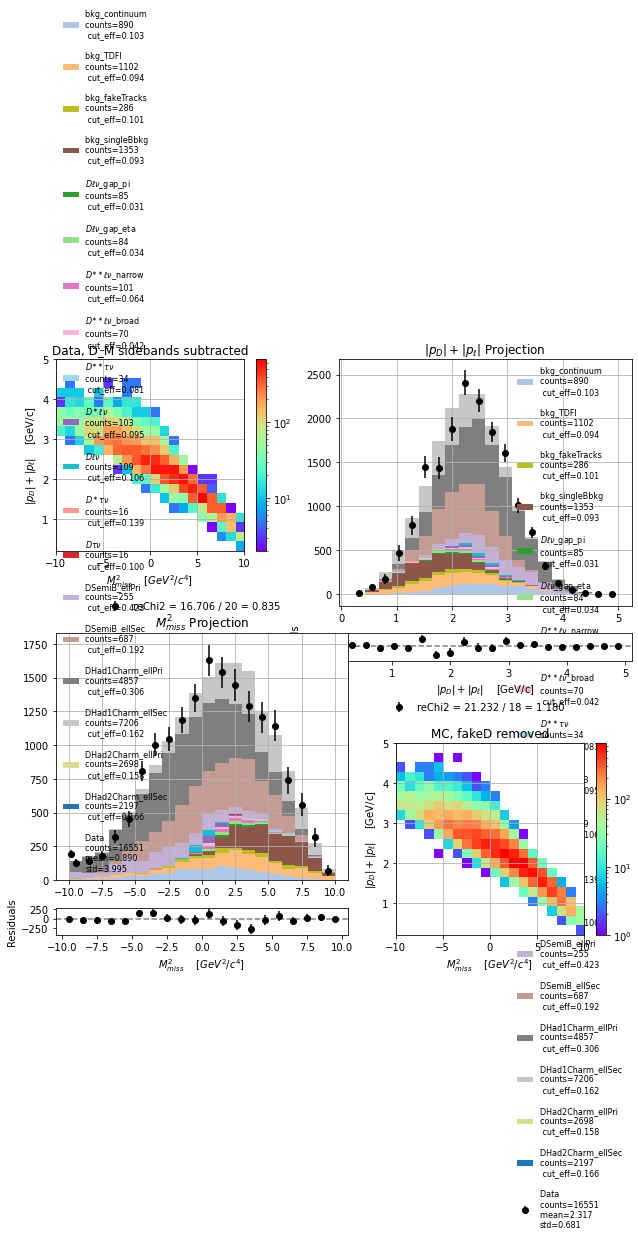

In [138]:
# BDT signal
b_mm2 = np.linspace(-10,10,21)
b_pDl = np.linspace(0.2,5,21)
weights={'data left sideband': 77/82/2 * 1000/187,
         'data right sideband': 77/71.7/2 * 1000/187,
         'data signal region': 1000/187,
         'DSemiB_ellPri':       5,
         'DSemiB_ellSec':       4.77,
         'DHad1Charm_ellPri':   1.14,
         'DHad1Charm_ellSec':   0.37,
         'DHad2Charm_ellPri':   0,
         'DHad2Charm_ellSec':   0, }

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_vtxReChi2>6', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': weights,
          'correction': False,
          'mask': ['bkg_fakeD']}
a, b = mpl_comb.plot_data_subtracted_and_mc(**par_dict)

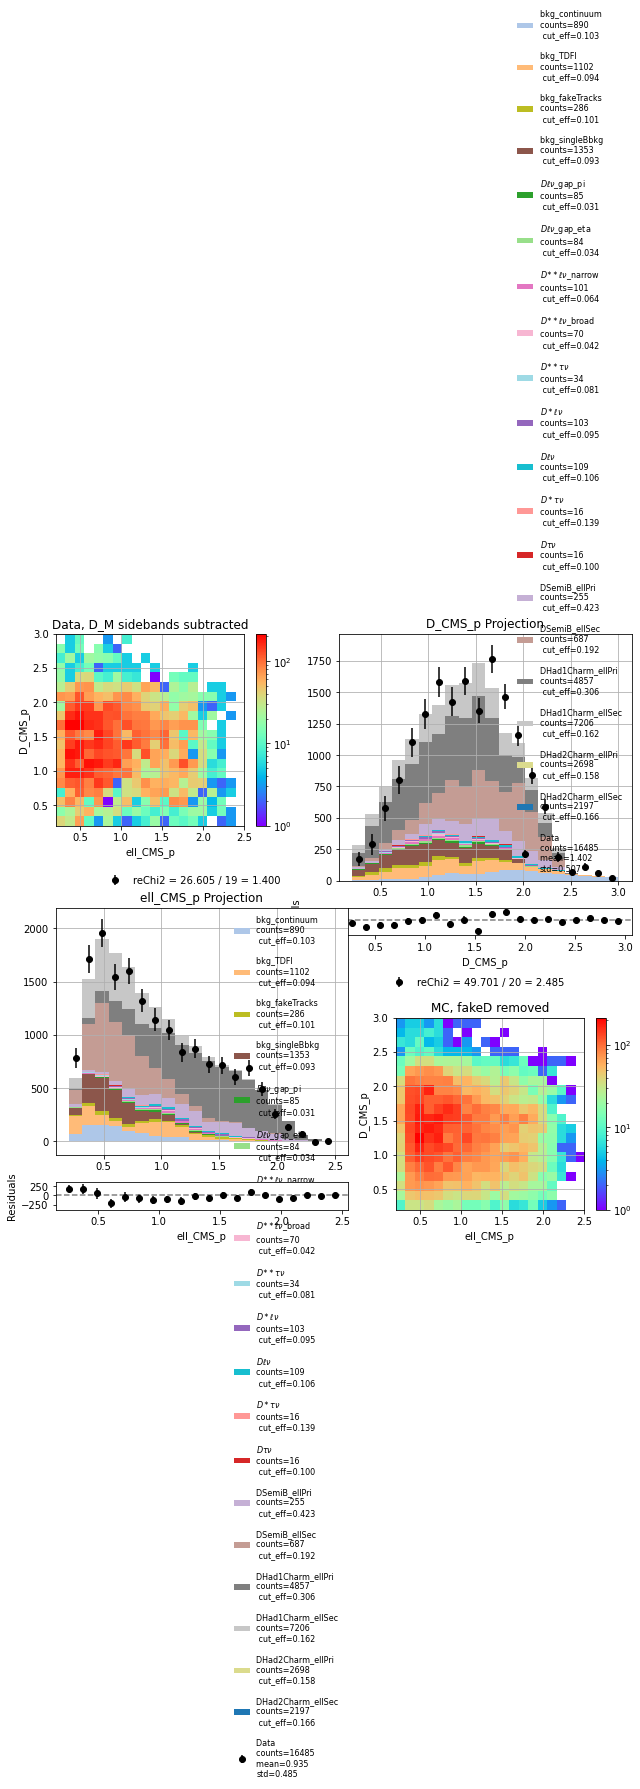

In [140]:
# BDT signal, pl; pd
b_mm2 = np.linspace(0.2,2.5,21)
b_pDl = np.linspace(0.2,3,21)
par_dict={'var_list':['ell_CMS_p','D_CMS_p'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_vtxReChi2>6',
          'weights': weights,
          'correction': False,
          'mask': ['bkg_fakeD']}
a,b = mpl_comb.plot_data_subtracted_and_mc(**par_dict)